# Gradient descent
### Part 1

The chosen formula is the Three hump Camel function which is valley shaped. This provides three local minima.

 - We start with a starting coordinate; that is values of x and y based on the three hump formula which is 
 f(x)=2*x^2 - 1.05*(x^4) + (x^6)/6 + (x*y) + (y^2)
 
 - Find the gradient at the starting point
 - If it is close to 0 then return these as minimum values for the chosen function
 - Otherwise iterate until the gradient of the tangent is 0 or close to 0

Iterate as follows:
 - Take a small step in the downhill direction (opposite to the gradient such that the gradient at the next point is lower)
 - Find the gradient
 - If it is close to zero then stop else repeat process by moving down the function

Define: 

eta- Step size
x- initial value for x
y- initial value for y
iter- number of iterations
tol- tolerance level, level at which the when the gradient is "tol" away from zero, iterations will stop



In [0]:
#from sympy import Symbol, Derivative
#x= Symbol('x')
#y=Symbol('y')
import numpy as np #chosen library is numpy
from mpl_toolkits import mplot3d
import matplotlib #used as graph plotting library
import matplotlib.pyplot as plt #pyplot makes graph interactive


%matplotlib inline 

In [0]:
def fn_loss(x, y):
    # The loss Function is also known as Cost function (height)
    return  2*x**2 - 1.05*(x**4) + (x**6)/6 + (x*y) + (y**2)
    
def fn_grad1(x,y):
    #return derivative(fn_loss(x,y),x)
    return 4*x-4.2*(x**3)+x**5+y
def fn_grad2(x,y):
    #return derivative(fn_loss(x,y),x)
    return x+2*y

In [0]:
def gradient_descent(eta=0.005,n_iter=10000):
    # initialise lists to score the path of {x,y} as lst and the path of the loss functions
    # the following are the empty lists that will be gradually filled in until the minimum is found
    lst=[]
    lst_loss=[] 
    lst_x=[]
    lst_y=[]
    lst_g_x=[]
    lst_g_y=[]
    

    # choose a starting point 
    x=3.5
    y=3
    g_x = fn_grad1(x,y) 
    g_y = fn_grad2(x,y) 


    tol = 1e-5 # tolerance level

    lst.append([x,y]) 
    lst_x.append(x) # stores the values of x 
    lst_y.append(y) #stores the values of y
    lst_g_x.append(g_x) # stores the values of g_x 
    lst_g_y.append(g_y) #stores the values of g_y
    
    loss_this = fn_loss(x,y) # assigns the chosen formula to loss_this
    lst_loss.append(loss_this) # For the different points chosen the value of the loss is calculated and stored in lst_loss
    g_x = fn_grad1(x,y) # finds the  value of the derivative with respect to x at (x,y)
    g_y = fn_grad2(x,y) # finds the value of the derivative with respect to y at (x,y)
    g = g_x + g_y 

    for i in range(n_iter):
        if g < tol:  # if the gradient is less than tolerance level we stop here else we store the values used and repeat
            break
        g_x = fn_grad1(x,y) 
        x += -eta * g_x # find a new value of x using the previous value of x, the step size and the gradient
        lst_g_x.append(g_x)
        lst_x.append(x)
        g_y = fn_grad2(x,y)
        y += -eta * g_y # the same is done as for x to find a new value of y
        lst_g_y.append(g_y)
        lst_y.append(y)
        lst.append([x,y])
        loss_this = fn_loss(x,y)
        lst_loss.append(loss_this)


    return lst_x,lst_y,lst_loss,lst_g_x,lst_g_y,x,y
    

In [5]:
n_iter=10000
lst_x,lst_y,lst_loss,lst_g_x,lst_g_y,x,y=gradient_descent(0.005,10000)
len(lst_g_x)
len(lst_g_y)
x


-4.8926654541804946e-36

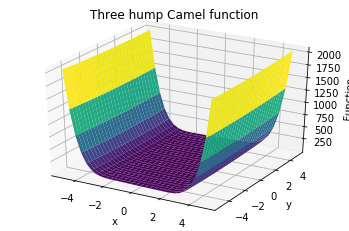

In [6]:
# Vizualize Hump plot
a = np.linspace(-5, 5, 30)
b = np.linspace(-5, 5, 30)
A, B = np.meshgrid(a, b)
C = fn_loss(A, B)
ax = plt.axes(projection='3d')
ax.plot_surface(A, B, C, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Three hump Camel function');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Function');

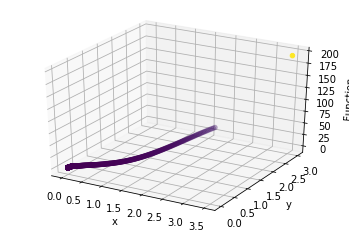

In [7]:
# Visualize Function
ax = plt.axes(projection='3d')
ax.scatter(lst_x,lst_y,lst_loss, c=lst_loss, cmap='viridis', linewidth=1);
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Function');

In [8]:
print('The minimum of (x,y) is {}'.format(np.round((x,y),10)))

The minimum of (x,y) is [-0.  0.]


In [0]:
def Cost(iter=10000):
    lst_Cost=[]   
    

    for i in range(iter):
        lst_x,lst_y,lst_loss,lst_g_x,lst_g_y,x,y=gradient_descent(0.001,i)
        FCost=fn_loss(x,y)
        lst_Cost.append(FCost)
        
    return lst_Cost

In [10]:
iter=10000
FCost=Cost(iter)
len(range(iter))


10000

Text(0, 0.5, 'loss')

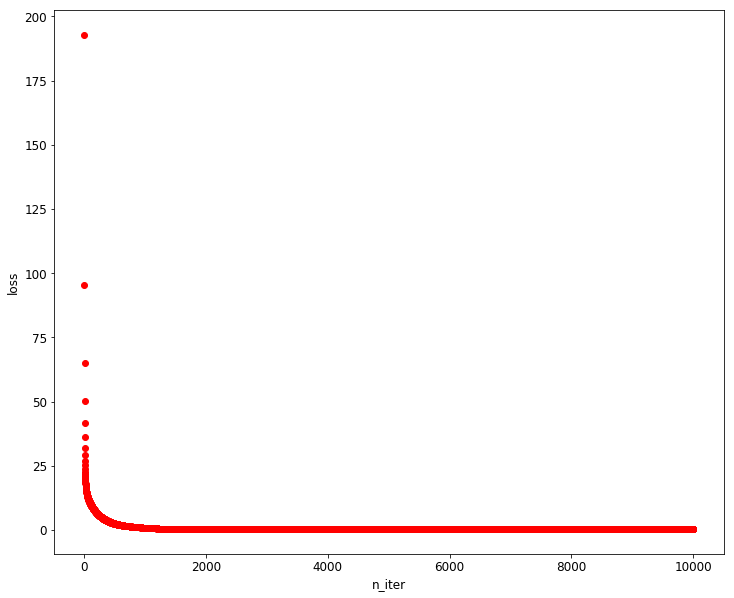

In [0]:
font = {'size': 12}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(range(iter),FCost,color='red',marker='o')
ax1.set_xlabel('n_iter')
ax1.set_ylabel('loss')


In [0]:
import numpy as np

class gd_1d:
    
    def __init__(self, fn_loss, fn_grad):
        self.fn_loss = fn_loss
        self.fn_grad = fn_grad
        
    def pv(self, x_init, n_iter, eta, tol):
        x = x_init
        
        loss_path = []
        x_path = []
        
        x_path.append(x)
        loss_this = self.fn_loss(x)
        loss_path.append(loss_this)
        g = self.fn_grad(x)

        for i in range(n_iter):
            if np.abs(g) < tol or np.isnan(g):
                break
            g = self.fn_grad(x)
            x += -eta * g
            x_path.append(x)
            loss_this = self.fn_loss(x)
            loss_path.append(loss_this)
            
        if np.isnan(g):
            print('Exploded')
        elif np.abs(g) > tol:
            print('Did not converge')
        else:
            print('Converged in {} steps.  Loss fn {} achieved by x = {}'.format(i, loss_this, x))
        self.loss_path = np.array(loss_path)
        self.x_path = np.array(x_path)
        
    def momentum(self, x_init, n_iter, eta, tol, alpha):
        x = x_init
        
        loss_path = []
        x_path = []
        
        x_path.append(x)
        loss_this = self.fn_loss(x)
        loss_path.append(loss_this)
        g = self.fn_grad(x)
        nu = 0

        for i in range(n_iter):
            g = self.fn_grad(x)
            if np.abs(g) < tol or np.isnan(g):
                break

            nu = alpha * nu + eta * g
            x += -nu
            x_path.append(x)
            loss_this = self.fn_loss(x)
            loss_path.append(loss_this)

        if np.isnan(g):
            print('Exploded')
        elif np.abs(g) > tol:
            print('Did not converge')
        else:
            print('Converged in {} steps.  Loss fn {} achieved by x = {}'.format(i, loss_this, x))
        self.loss_path = np.array(loss_path)
        self.x_path = np.array(x_path)

    def nag(self, x_init, n_iter, eta, tol, alpha):
        x = x_init
        
        loss_path = []
        x_path = []
        
        x_path.append(x)
        loss_this = self.fn_loss(x)
        loss_path.append(loss_this)
        g = self.fn_grad(x)
        nu = 0

        for i in range(n_iter):
            # i starts from 0 so add 1
            # The formula for mu was mentioned by David Barber UCL as being Nesterovs suggestion
            mu = 1 - 3 / (i + 1 + 5) 
            g = self.fn_grad(x - mu*nu)
            if np.abs(g) < tol or np.isnan(g):
                break

            nu = alpha * nu + eta * g
            x += -nu
            x_path.append(x)
            loss_this = self.fn_loss(x)
            loss_path.append(loss_this)

        if np.isnan(g):
            print('Exploded')
        elif np.abs(g) > tol:
            print('Did not converge')
        else:
            print('Converged in {} steps.  Loss fn {} achieved by x = {}'.format(i, loss_this, x))
        self.loss_path = np.array(loss_path)
        self.x_path = np.array(x_path)

ModuleNotFoundError: ignored